# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import math
from scipy import optimize
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Question 1

In [ ]:
As the model is a static model, and utility is strictly increasing with consumption the consumer will always choose to spend all his wealth on consumption, hence c = x,
which is substituted directly into the utility function.

In [3]:
#Utility function defined
def u_func(c, l):
    return np.log(m + w * l - (t_0 * w * l + t_1 * max(w * l-kappa,0))) - v*l **(1+1/eps)/(1+1/eps)

#Variables defined
m = 1
v = 10
eps = 0.3
t_0 = 0.4
t_1 = 0.1
kappa = 0.4

#Lists pre defined
l_plot = []
c_plot = []
w_plot = []

def value_of_choice(l,m,v,eps,t_0,t_1,kappa,w):
        c = m + w * l - (t_0 * w * l + t_1 * max(w * l - kappa,0))
        return -u_func(c,l)

#There is added 0.05 to the end of the renge in order to account for zero indexing.
for w in np.arange(0.5,1.5 + 0.05,0.05):
    

    sol_case = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,v,eps,t_0,t_1,kappa,w))

    l = sol_case.x
    c = m + w * l - (t_0 * w * l + t_1 * max(w * l-kappa,0))

    # Store results as lists
    l_plot.append(f'{l:.3}')
    c_plot.append(f'{c:.3}')
    w_plot.append(f'{w:.3}')  

    #float l for plotting
    l_plot = [float(i) for i in l_plot]

#Print the newly stored lists (to see that they are stored correctly)
print('l results: ' + str(l_plot))
print('c results: ' + str(c_plot))
print('w results: ' + str(w_plot))

l results: [0.339, 0.348, 0.356, 0.363, 0.37, 0.376, 0.382, 0.388, 0.393, 0.398, 0.4, 0.387, 0.391, 0.395, 0.399, 0.403, 0.407, 0.41, 0.413, 0.417, 0.42]
c results: ['1.1', '1.11', '1.13', '1.14', '1.16', '1.17', '1.18', '1.2', '1.21', '1.23', '1.24', '1.24', '1.26', '1.27', '1.28', '1.29', '1.3', '1.32', '1.33', '1.34', '1.35']
w results: ['0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95', '1.0', '1.05', '1.1', '1.15', '1.2', '1.25', '1.3', '1.35', '1.4', '1.45', '1.5']


In [ ]:
Viewing the plot we see, that there is a break where higher wages will result in less time spent working. This is due to the new tax bracket off-setting the gain from an
increase in consumption for the consumer. Same can be seen for the consumption, here there is a point where consumption stagnates as the consumer when maximizing will
work less at the higher wage due to the tax bracket changing if he were to work more.

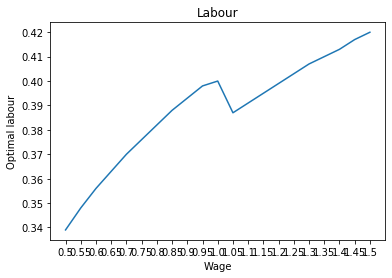

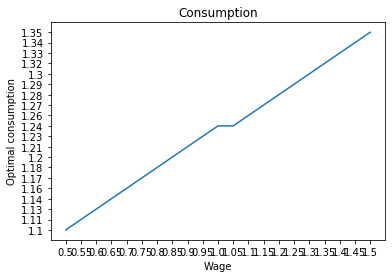

In [4]:
#Plot of labour and wage
plt.plot(w_plot, l_plot)
plt.xlabel("Wage")
plt.ylabel("Optimal labour")
plt.title("Labour")
plt.show()

#Plot of consumption and wage
plt.plot(w_plot, c_plot)
plt.xlabel("Wage")
plt.ylabel("Optimal consumption")
plt.title("Consumption")
plt.show()

In [5]:
def u_func3(c, l):
    return np.log(m + wi * l - (t_0 * wi * l + t_1 * max(wi * l-kappa,0))) - v*l **(1+1/eps)/(1+1/eps)

def value_of_choice3(l,m,v,eps,t_0,t_1,kappa,wi):
    c = m + wi * l - (t_0 * wi * l + t_1 * max(wi * l - kappa,0))
    return -u_func3(c,l)

N = 10000

# w = np.random.uniform(size=N, low=0.5, high=1.5)
w = np.linspace(0.5, 1.5, N)

for eps in [0.3, 0.1]:

    l = []
    c = []
    tax_revenue = 0
    for i, wi in enumerate(w):

        sol_case = optimize.minimize_scalar(
            value_of_choice3, method='bounded',
            bounds=(0,1),args=(m,v,eps,t_0,t_1,kappa,wi))

        l.append(sol_case.x)
        c.append(m + wi * l[-1] - (t_0 * wi * l[-1] + t_1 * max(wi * l[-1] - kappa,0)))

        tax_revenue += t_0 * wi * l[i] + t_1 * np.max(wi * l[i] - kappa, 0)
    print(tax_revenue)

1571.9643471169
3194.9003633141756


In [ ]:
"""The tax revenue increases when the elasticity of labour falls from 0.3 to 0.1."""

# Question 5

In [ ]:
A""om the perspective of the available tax revenue, the best case for t_0 is 0.78, with no top tax bracket (t_1 = 0). However, it is currently unclear how this would affect
a deadweight loss and overall utility in the society, so it is not to say if this is actually the best values for t_0, t_1 and Kappa"""

In [6]:
N = 100
w = np.linspace(0.5, 1.5, N)
eps = 0.3
tax = {}

for t_0 in np.linspace(0,1, 10):
    for t_1 in np.linspace(0, 1, 10):
        for kappa in np.linspace(t_0, 1, 10):
            l = []
            c = []
            tax_revenue = 0
            for i, wi in enumerate(w):

                sol_case = optimize.minimize_scalar(
                    value_of_choice3, method='bounded',
                    bounds=(0,1),args=(m,v,eps,t_0,t_1,kappa,wi))

                l.append(sol_case.x)
                c.append(m + wi * l[-1] - (t_0 * wi * l[-1] + t_1 * max(wi * l[-1] - kappa,0)))

                tax_revenue += t_0 * wi * l[i] + t_1 * np.max(wi * l[i] - kappa, 0)
            key = (round(t_0, 2), round(t_1, 2), round(kappa, 2))
            tax[key] = tax_revenue
            print(f"{key} -> T = {round(tax_revenue,2)}")

# Conclusion

ADD CONCISE CONLUSION.